In [27]:
#Observable trends in Pyber analysis
# 1. Most of Pyber's demand is concentrated in urban cities, which contribute 63% of fare dollars, 
#    68% of ride volume, and 81% of drivers.
# 2. Rural cities have the highest average fare ($34.62) but lowest number of fares. Suburban cities have the second highest
#    average fare ($30.97) and second highest number of fares. Intuitively, it makes sense that average trip distance would be highest
#    in rural areas where destinations are more spread out, hence leading to higher average fare.
# 3. While Pyber's volume is dominated by urban cities, there are nearly twice the number of cities in this category than suburban cities.
#    In other words, the ranking by city type in each visualizaiton also aligns with the number of cities in each type:
#    Urban = 66, Suburban = 36, Rural = 18

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_cityride_df = pd.merge(ride_df, city_df, on="city", how="outer")

# Display the data table for preview
merge_cityride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


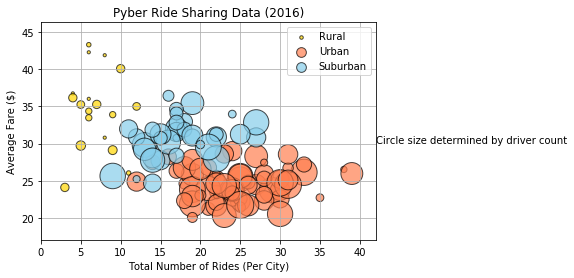

In [28]:
# Obtain the x and y coordinates for each of the three city types
# x-axis = total number of rides per city
# y-axis = average fare ($) per city
# circle size = driver count, need to create list of city driver counts 
# legend = city type

#Group merged table by city
city_grouped_df = merge_cityride_df.groupby(["city"])

#Add columns for total rides and average fare
city_total_rides = pd.DataFrame(city_grouped_df["ride_id"].count())
city_total_rides["Ride Count"] = city_grouped_df["ride_id"].count()
city_total_rides["Average Fare"] = city_grouped_df["fare"].mean()

#Merge table back to city_df to get city driver count
merge_city_total_rides = pd.merge(city_total_rides, city_df, on="city", how="outer")

#Use loc to reduce to needed columns
df = merge_city_total_rides.loc[:, ["city", "Ride Count", "Average Fare", "driver_count", "type"]]

#Use loc to find data subsets for each city type
rural_rides = df.loc[df["type"]=="Rural", ["Ride Count"]]
rural_avg_fare = df.loc[df["type"]=="Rural", ["Average Fare"]]
rural_driver_count = df.loc[df["type"]=="Rural", ["driver_count"]]

urban_rides = df.loc[df["type"]=="Urban", ["Ride Count"]]
urban_avg_fare = df.loc[df["type"]=="Urban", ["Average Fare"]]
urban_driver_count = df.loc[df["type"]=="Urban", ["driver_count"]]

suburban_rides = df.loc[df["type"]=="Suburban", ["Ride Count"]]
suburban_avg_fare = df.loc[df["type"]=="Suburban", ["Average Fare"]]
suburban_driver_count = df.loc[df["type"]=="Suburban", ["driver_count"]]

#Create scatter plots
rural = plt.scatter(rural_rides, rural_avg_fare, marker="o", alpha=0.7, facecolors="Gold", edgecolors="black", linewidth=1, s=10*(rural_driver_count))
urban = plt.scatter(urban_rides, urban_avg_fare, marker="o", alpha=0.7, facecolors="Coral", edgecolors="black", linewidth=1, s=10*(urban_driver_count))
suburban = plt.scatter(suburban_rides, suburban_avg_fare, marker="o", alpha=0.7, facecolors="SkyBlue", edgecolors="black", linewidth=1, s=10*(urban_driver_count))

# Incorporate the other graph properties
# Set the upper and lower limits of our y axis
plt.ylim(min(df["Average Fare"])-3,max(df["Average Fare"])+3)
plt.xlim(min(df["Ride Count"])-3,max(df["Ride Count"])+3)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Add gridlines
plt.grid()

# Create a legend
plt.legend((rural, urban, suburban), ("Rural", "Urban", "Suburban"), loc="upper right", markerscale=0.5)
          
# Incorporate a text label regarding circle size
plt.text(42, 30, "Circle size determined by driver count", size=10)

# Save Figure
plt.savefig("bubble_avgfares_and_totalrides.png")

## Total Fares by City Type

In [29]:
# Calculate Type Percents
type_grouped_df = merge_cityride_df.groupby(["type"])
total_fares = merge_cityride_df["fare"].sum()
city_type_total_fares = type_grouped_df["fare"].sum()
percent_of_fares = city_type_total_fares/total_fares

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
fare_slices = percent_of_fares
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

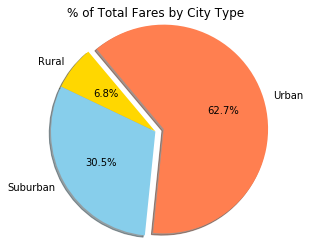

In [30]:
# Show Figure
plt.title("% of Total Fares by City Type")
plt.pie(fare_slices, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=130, radius = 1.2)

# Save Figure
plt.savefig("pie_percent_of_fares_by_type.png")

## Total Rides by City Type

In [31]:
# Calculate Ride Percents
total_rides = merge_cityride_df["ride_id"].count()
city_type_total_rides = type_grouped_df["ride_id"].count()
percent_of_rides = city_type_total_rides/total_rides

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
ride_slices = percent_of_rides
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)


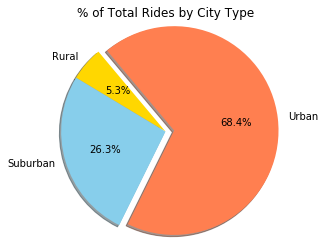

In [32]:
# Show Figure
plt.title("% of Total Rides by City Type")
plt.pie(ride_slices, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=130, radius = 1.2)

# Save Figure
plt.savefig("pie_percent_of_rides_by_type.png")

## Total Drivers by City Type

In [33]:
# Calculate Driver Percents
total_drivers = city_df["driver_count"].sum()
city_type_df = city_df.groupby(["type"])
total_city_type_drivers = city_type_df["driver_count"].sum()
percent_of_drivers = total_city_type_drivers/total_drivers

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
driver_slices = percent_of_drivers
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)


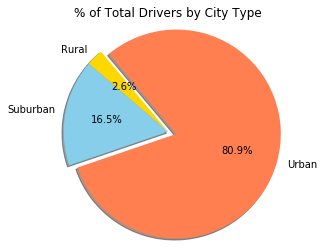

In [34]:
# Show Figure
plt.title("% of Total Drivers by City Type")
plt.pie(driver_slices, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.1f%%", startangle=130, radius = 1.2)

# Save Figure
plt.savefig("pie_percent_of_drivers_by_type.png")